In [1]:
!unzip "/content/drive/MyDrive/vision_transformer.zip" -d "/content/"

Archive:  /content/drive/MyDrive/vision_transformer.zip
   creating: /content/vision_transformer/test/
   creating: /content/vision_transformer/test/Pothole/
  inflating: /content/vision_transformer/test/Pothole/pothole401.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole402.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole403.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole404.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole405.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole406.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole407.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole408.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole409.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole410.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole411.jpg  
  inflating: /content/vision_transformer/test/Pothole/pothole

In [2]:
import os
import glob
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define the main dataset directory
dataset_dir = "/content/vision_transformer"

# Define the list of class names
class_names = ["Pothole", "speedbreaker"]

# Initialize lists to store images and labels
images = []
labels = []

# Iterate through train, test, and valid subfolders
for split in ["train", "test", "valid"]:
    split_dir = os.path.join(dataset_dir, split)

    # Iterate through class subfolders (pothole and speedbreaker)
    for class_name in class_names:
        class_dir = os.path.join(split_dir, class_name)

        # Get a list of image files in the class folder
        image_files = glob.glob(os.path.join(class_dir, "*.jpg"))  # Adjust the file extension as needed

        # Load and preprocess each image, and assign a label
        for image_file in image_files:
            img = load_img(image_file, target_size=(224, 224))  # Adjust target size as needed
            img = img_to_array(img)
            img = img / 255.0  # Normalize pixel values
            images.append(img)

            label = class_names.index(class_name)
            labels.append(label)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# One-hot encode labels if needed
num_classes = len(class_names)
one_hot_labels = to_categorical(labels, num_classes=num_classes)

# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(images, one_hot_labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

VGG16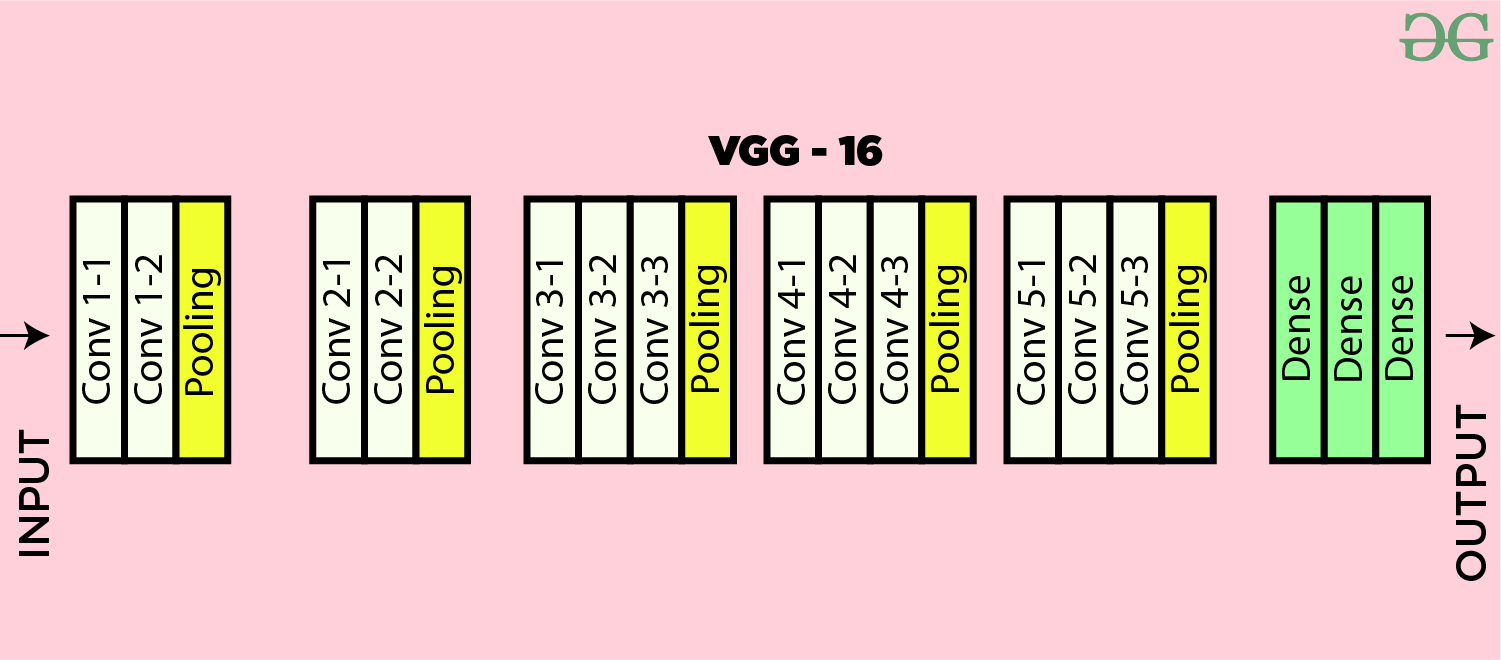

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten,Dense
from tensorflow.keras.models import Model

In [4]:
input_shape=(224,224,3)

In [7]:
def create_vgg16():
  inputs=Input(input_shape)

  #Block 1
  x= Conv2D(64,(3,3),activation='relu', padding='same')(inputs)
  x= Conv2D(64,(3,3), activation='relu',padding='same')(x)
  x= MaxPooling2D((2,2),strides=(2,2))(x)

  #Block 2
  x= Conv2D(128, (3,3), activation='relu', padding='same')(x)
  x= Conv2D(128, (3,3), activation='relu', padding='same')(x)
  x= MaxPooling2D((2,2),strides=(2,2))(x)

  #Block3
  x= Conv2D(256, (3,3), activation='relu', padding='same')(x)
  x= Conv2D(256, (3,3), activation='relu', padding='same')(x)
  x= Conv2D(256, (3,3), activation='relu', padding='same')(x)
  x= MaxPooling2D((2,2),strides=(2,2))(x)

  #Block 4
  x= Conv2D(512, (3,3),  activation='relu', padding='same')(x)
  x= Conv2D(512, (3,3), activation='relu', padding='same')(x)
  x= Conv2D(512, (3,3), activation='relu', padding='same')(x)
  x= MaxPooling2D((2,2), strides=(2,2))(x)

  # Block 5
  x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
  x = Conv2D(512, (3, 3), activation='relu', padding='same')(x)
  x = MaxPooling2D((2, 2), strides=(2, 2))(x)

  #Fully Connected Layers
  x= Flatten()(x)
  x= Dense(4096, activation='relu')(x)
  x= Dense(4096, activation='relu')(x)

  # Output layer for our classes (2 classes: Pothole and speedbreaker)
  outputs= Dense(2, activation='softmax')(x)

  #Creating the model
  model= Model(inputs, outputs)

  return model

In [8]:
vgg16_model = create_vgg16()

In [9]:
vgg16_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_11 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_13 (Conv2D)          (None, 112, 112, 128)     147584    
                                                             

In [10]:
vgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
vgg16_model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
25/25 [==============================] - 10s 400ms/step - loss: 0.6934 - accuracy: 0.4678
Epoch 2/50
25/25 [==============================] - 11s 433ms/step - loss: 0.6930 - accuracy: 0.5064
Epoch 3/50
25/25 [==============================] - 10s 400ms/step - loss: 0.6936 - accuracy: 0.5064
Epoch 4/50
25/25 [==============================] - 10s 395ms/step - loss: 0.6931 - accuracy: 0.5064
Epoch 5/50
25/25 [==============================] - 10s 390ms/step - loss: 0.6932 - accuracy: 0.5064
Epoch 6/50
25/25 [==============================] - 10s 389ms/step - loss: 0.6931 - accuracy: 0.5064
Epoch 7/50
25/25 [==============================] - 10s 389ms/step - loss: 0.6933 - accuracy: 0.5064
Epoch 8/50
25/25 [==============================] - 10s 388ms/step - loss: 0.6931 - accuracy: 0.5064
Epoch 9/50
25/25 [==============================] - 10s 391ms/step - loss: 0.6931 - accuracy: 0.5064
Epoch 10/50
25/25 [==============================] - 10s 394ms/step - loss: 0.6931 - accura

In [15]:
test_loss, test_acc = vgg16_model.evaluate(X_test, y_test)

8/8 [==============================] - 1s 124ms/step - loss: 0.6935 - accuracy: 0.4897


In [16]:
print(f"Test accuracy: {test_acc}")

Test accuracy: 0.4897119402885437


1/1 [==============================] - 0s 19ms/step


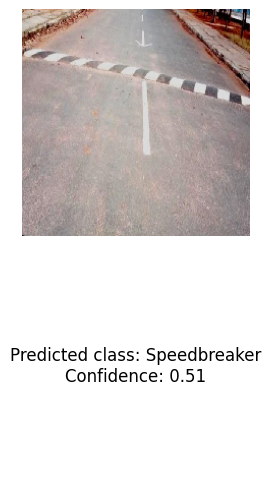

In [26]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt

# Load and preprocess the test image
image_path = "/content/vision_transformer/test/speedbreaker/speedbreaker401.jpg"  # Replace with the actual path to your test image
img = load_img(image_path, target_size=(224, 224))  # Adjust target size as needed
img_array = img_to_array(img)
img_array = img_array / 255.0  # Normalize pixel values (if your training data was also normalized)
img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension

# Make a prediction using the VGG16 model
predictions = vgg16_model.predict(img_array)

# Assuming two classes: "Pothole" (class 0) and "Speedbreaker" (class 1)
class_names = ["Pothole", "Speedbreaker"]

# Get the predicted class index
predicted_class_index = np.argmax(predictions)

# Get the predicted class label
predicted_class = class_names[predicted_class_index]

# Get the confidence score for the predicted class
confidence_score = predictions[0][predicted_class_index]

# Display the image with the predicted class and confidence score
plt.figure(figsize=(3, 5))  # Adjust figure size as needed
plt.subplot(2, 1, 1)  # Create a subplot for the image
plt.imshow(img)
plt.axis('off')  # Turn off axis labels

plt.subplot(2, 1, 2)  # Create a subplot for the predicted class and confidence score
text = f"Predicted class: {predicted_class}\nConfidence: {confidence_score:.2f}"
plt.text(0.5, 0.5, text, fontsize=12, ha='center', va='center')
plt.axis('off')  # Turn off axis labels

plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()


8/8 [==============================] - 1s 125ms/step


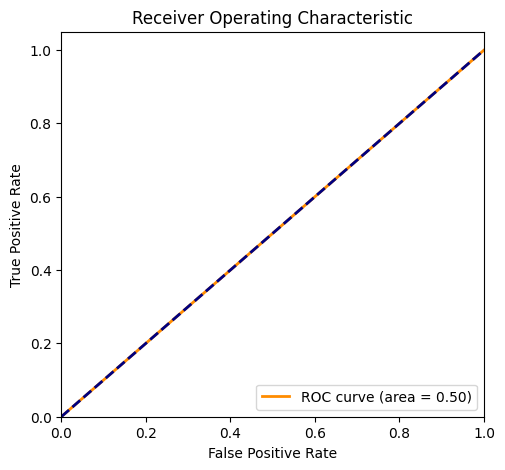

In [29]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
y_pred = vgg16_model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred[:, 0])
roc_auc = auc(fpr, tpr)

# Plotting ROC curve
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')

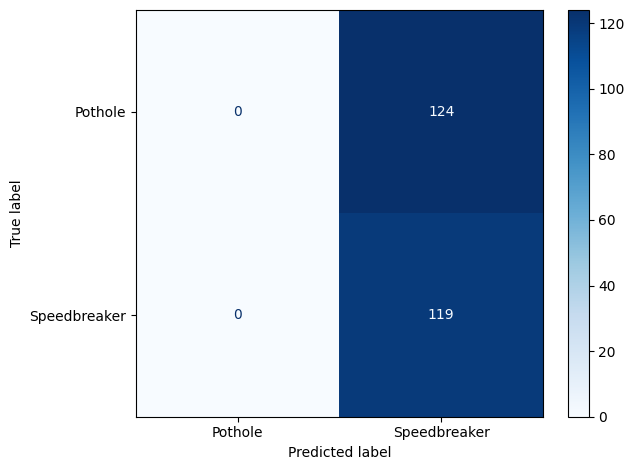

In [31]:
# Creating a confusion matrix
y_true = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_class)

# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_mtx, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, values_format="d")
plt.tight_layout()
plt.show()